In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


# Step 1: Clean and prepare data

In [82]:
df = pd.read_csv('Data for Cleaning & Modeling.csv')

df.head()

C:\Users\Jadeyuan\AppData\Local\Temp\ipykernel_21648\153025051.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data for Cleaning & Modeling.csv')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [83]:
df.shape

(400000, 32)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [85]:
df.describe()

,X2,X3,X13,X21,X22,X24,X25,X26,X27,X28,X29,X31
count,3.999990e+05,3.999990e+05,3.389720e+05,399999.000000,399999.000000,399999.000000,181198.000000,51155.000000,399999.000000,399999.000000,3.999990e+05,399999.000000
mean,9.984493e+06,1.133899e+07,7.316015e+04,17.000786,0.274528,0.817155,34.312117,76.320399,11.117953,0.152285,1.595605e+04,24.983010
std,7.928778e+06,8.663918e+06,5.586770e+04,7.704189,0.778209,1.058746,21.787313,29.804509,4.898569,0.497389,1.952811e+04,11.473478
min,5.473400e+04,7.069900e+04,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000
25%,3.151742e+06,3.727712e+06,4.500000e+04,11.250000,0.000000,0.000000,16.000000,54.000000,8.000000,0.000000,6.453000e+03,17.000000
50%,8.234778e+06,9.667699e+06,6.300000e+04,16.700000,0.000000,0.000000,31.000000,80.000000,10.000000,0.000000,1.177800e+04,23.000000
75%,1.532960e+07,1.731219e+07,8.820000e+04,22.520000,0.000000,1.000000,50.000000,103.000000,14.000000,0.000000,2.020900e+04,32.000000
max,2.875315e+07,3.127805e+07,7.500000e+06,39.990000,29.000000,8.000000,188.000000,129.000000,76.000000,63.000000,2.568995e+06,121.000000


In [86]:
df.isnull().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

In [87]:
df.corr()

,X2,X3,X13,X21,X22,X24,X25,X26,X27,X28,X29,X31
X2,1.000000,0.994894,0.032964,0.119845,0.078974,-0.015826,-0.040541,-0.159457,0.115167,0.122491,0.022592,0.093876
X3,0.994894,1.000000,0.033507,0.118335,0.078849,-0.017545,-0.040254,-0.153880,0.113991,0.124480,0.022683,0.092768
X13,0.032964,0.033507,1.000000,-0.183002,0.060688,0.064709,-0.057152,-0.099963,0.154522,-0.016127,0.325022,0.222566
X21,0.119845,0.118335,-0.183002,1.000000,-0.002000,0.000231,0.005659,0.083346,0.305150,-0.046224,0.147926,0.229761
X22,0.078974,0.078849,0.060688,-0.002000,1.000000,0.024421,-0.578255,-0.075937,0.061907,-0.009066,-0.030508,0.133576
X24,-0.015826,-0.017545,0.064709,0.000231,0.024421,1.000000,0.006220,-0.088601,0.099851,0.039298,-0.015203,0.134220
X25,-0.040541,-0.040254,-0.057152,0.005659,-0.578255,0.006220,1.000000,0.013552,-0.050316,0.084012,-0.025075,-0.063900
X26,-0.159457,-0.153880,-0.099963,0.083346,-0.075937,-0.088601,0.013552,1.000000,-0.011314,-0.195652,-0.008244,-0.256444
X27,0.115167,0.113991,0.154522,0.305150,0.061907,0.099851,-0.050316,-0.011314,1.000000,-0.030889,0.224595,0.677355
X28,0.122491,0.124480,-0.016127,-0.046224,-0.009066,0.039298,0.084012,-0.195652,-0.030889,1.000000,-0.097763,0.004092


In [88]:
#notice there are several columns disappearing, I am going to make some changes to such columns with numbers
df['X1'] = df['X1'].str.replace('%', '').astype(float)

In [89]:
df['X1'].head()

0    11.89
1    10.71
2    16.99
3    13.11
4    13.57
Name: X1, dtype: float64

In [90]:
df['X1'] = df['X1']/100
df['X1'].head()

0    0.1189
1    0.1071
2    0.1699
3    0.1311
4    0.1357
Name: X1, dtype: float64

In [91]:
df['X30'] = df['X30'].str.replace('%', '').astype(float)
df['X30'] = df['X30']/100
df['X30'].head()

0    0.521
1    0.767
2    0.663
3    0.404
4    0.256
Name: X30, dtype: float64

In [92]:
df['X4'] = df['X4'].str.replace('$', '').str.replace(',', '').astype(float)
df['X4'].head()

C:\Users\Jadeyuan\AppData\Local\Temp\ipykernel_21648\2939403669.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X4'] = df['X4'].str.replace('$', '').str.replace(',', '').astype(float)


0    25000.0
1     7000.0
2    25000.0
3     1200.0
4    10800.0
Name: X4, dtype: float64

In [93]:
df['X5'] = df['X5'].str.replace('$', '').str.replace(',', '').astype(float)
df['X5'].head()

C:\Users\Jadeyuan\AppData\Local\Temp\ipykernel_21648\187560545.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X5'] = df['X5'].str.replace('$', '').str.replace(',', '').astype(float)


0    25000.0
1     7000.0
2    25000.0
3     1200.0
4    10800.0
Name: X5, dtype: float64

In [94]:
df['X6'] = df['X6'].str.replace('$', '').str.replace(',', '').astype(float)
df['X6'].head()

C:\Users\Jadeyuan\AppData\Local\Temp\ipykernel_21648\949461216.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['X6'] = df['X6'].str.replace('$', '').str.replace(',', '').astype(float)


0    19080.0
1      673.0
2    24725.0
3     1200.0
4    10692.0
Name: X6, dtype: float64

In [95]:
df.corr()

,X1,X2,X3,X4,X5,X6,X13,X21,X22,X24,X25,X26,X27,X28,X29,X30,X31
X1,1.000000,0.033545,0.035069,0.177732,0.178727,0.181031,-0.032207,0.158111,0.091661,0.210398,-0.058441,-0.034513,0.020455,0.073577,0.008171,0.342609,-0.027147
X2,0.033545,1.000000,0.994894,0.074648,0.078812,0.087005,0.032964,0.119845,0.078974,-0.015826,-0.040541,-0.159457,0.115167,0.122491,0.022592,-0.007783,0.093876
X3,0.035069,0.994894,1.000000,0.077571,0.081868,0.090367,0.033507,0.118335,0.078849,-0.017545,-0.040254,-0.153880,0.113991,0.124480,0.022683,-0.006541,0.092768
X4,0.177732,0.074648,0.077571,1.000000,0.998358,0.994675,0.359734,0.060622,0.008905,-0.002423,-0.041572,0.009126,0.204428,-0.078938,0.336650,0.117066,0.237455
X5,0.178727,0.078812,0.081868,0.998358,1.000000,0.996634,0.359130,0.062106,0.009519,-0.002642,-0.041704,0.008723,0.205362,-0.078351,0.336277,0.118395,0.237338
X6,0.181031,0.087005,0.090367,0.994675,0.996634,1.000000,0.357265,0.065765,0.010339,-0.004095,-0.038505,0.042647,0.206348,-0.076846,0.334836,0.120670,0.237691
X13,-0.032207,0.032964,0.033507,0.359734,0.359130,0.357265,1.000000,-0.183002,0.060688,0.064709,-0.057152,-0.099963,0.154522,-0.016127,0.325022,0.033673,0.222566
X21,0.158111,0.119845,0.118335,0.060622,0.062106,0.065765,-0.183002,1.000000,-0.002000,0.000231,0.005659,0.083346,0.305150,-0.046224,0.147926,0.206807,0.229761
X22,0.091661,0.078974,0.078849,0.008905,0.009519,0.010339,0.060688,-0.002000,1.000000,0.024421,-0.578255,-0.075937,0.061907,-0.009066,-0.030508,-0.011352,0.133576
X24,0.210398,-0.015826,-0.017545,-0.002423,-0.002642,-0.004095,0.064709,0.000231,0.024421,1.000000,0.006220,-0.088601,0.099851,0.039298,-0.015203,-0.096061,0.134220


<AxesSubplot:>

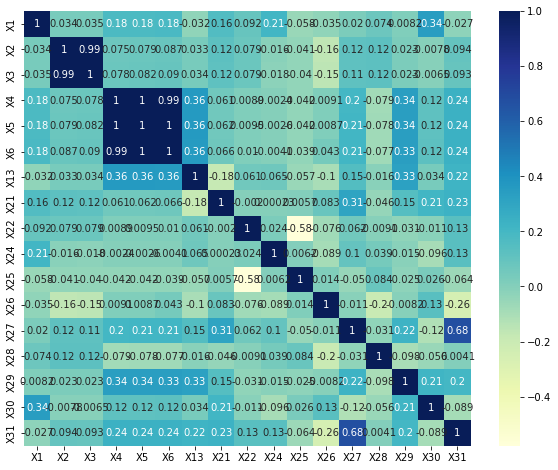

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [97]:
#since i want to predict the interest rate, I decide to drop the columns with little correlation with X1
#based on the correlation table, I decide to drop X2,3,13,26,27,29,31

df = df.drop(['X2','X3', 'X13','X26','X27','X29','X31'], axis=1)

In [98]:
#for the ones not in corr table: X7-13,14-20,23,32
#I would like to drop X10,15,16,18,19,20,23 since such information too personalized and I do not consider them related to interest rate
df = df.drop(['X10','X15', 'X16','X18','X19','X20','X23'], axis=1)

In [99]:
df.isnull().sum()

X1      61010
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X11     17538
X12     61361
X14         1
X17         1
X21         1
X22         1
X24         1
X25    218802
X28         1
X30       267
X32         1
dtype: int64

In [100]:
df[df['X4'].isnull()].index

Int64Index([364111], dtype='int64')

In [101]:
df = df.drop(364111)

In [102]:
df.isnull().sum()

X1      61010
X4          0
X5          0
X6          0
X7          0
X8      61269
X9      61269
X11     17537
X12     61360
X14         0
X17         0
X21         0
X22         0
X24         0
X25    218801
X28         0
X30       266
X32         0
dtype: int64

In [103]:
df['X8'].value_counts()

B    101668
C     90071
D     55621
A     53707
E     25518
F      9784
G      2361
Name: X8, dtype: int64

In [104]:
df['X8'] = df['X8'].fillna('Unknown')

In [105]:
df['X8'].value_counts()

B          101668
C           90071
Unknown     61269
D           55621
A           53707
E           25518
F            9784
G            2361
Name: X8, dtype: int64

In [106]:
df['X9'].value_counts()

B3    24009
B4    22611
B2    19853
C1    19285
C2    19182
B5    18301
C3    18244
C4    17225
B1    16894
C5    16135
A5    15485
D1    13840
A4    13837
D2    12479
D3    10818
D4    10131
A3     9031
D5     8353
A2     7678
A1     7676
E1     6408
E2     6181
E3     4978
E4     4291
E5     3660
F1     2878
F2     2202
F3     2022
F4     1537
F5     1145
G1      790
G2      598
G3      428
G4      300
G5      245
Name: X9, dtype: int64

In [107]:
df['X9'] = df['X9'].fillna('Unknown')

In [108]:
df['X9'].isnull().sum()

0

In [109]:
df['X11'].value_counts()

10+ years    128060
2 years       35427
3 years       31428
< 1 year      30607
5 years       27277
1 year        25321
4 years       24035
6 years       23062
7 years       22837
8 years       19139
9 years       15269
Name: X11, dtype: int64

In [110]:
df['X11'] = df['X11'].fillna('< 1 year')

In [111]:
df['X12'].value_counts()

MORTGAGE    172112
RENT        136778
OWN          29588
OTHER          124
NONE            36
ANY              1
Name: X12, dtype: int64

In [112]:
df['X12'] = df['X12'].fillna('Other')

In [113]:
df['X12'].value_counts()

MORTGAGE    172112
RENT        136778
Other        61360
OWN          29588
OTHER          124
NONE            36
ANY              1
Name: X12, dtype: int64

In [114]:
df['X12'] = df['X12'].str.replace('Other', 'OTHER')

In [115]:
df['X12'].value_counts()

MORTGAGE    172112
RENT        136778
OTHER        61484
OWN          29588
NONE            36
ANY              1
Name: X12, dtype: int64

In [116]:
df['X25'].value_counts()

9.0      3602
8.0      3573
13.0     3526
12.0     3516
14.0     3461
         ... 
129.0       1
109.0       1
139.0       1
108.0       1
127.0       1
Name: X25, Length: 143, dtype: int64

C:\Users\Jadeyuan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X25', ylabel='Density'>

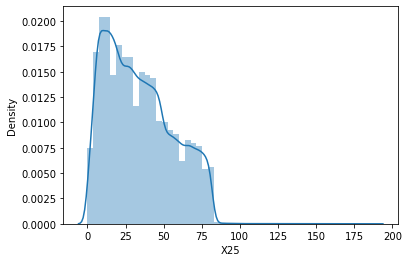

In [117]:
sns.distplot(df[df['X25'].notnull()]['X25'])

In [118]:
df['X25'].describe()

count    181198.000000
mean         34.312117
std          21.787313
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         188.000000
Name: X25, dtype: float64

In [119]:
df['X25'] = df['X25'].fillna(df['X25'].median())

In [120]:
df['X30'].value_counts()

0.0000    2021
0.5300     729
0.5700     725
0.5800     722
0.6100     710
          ... 
0.0083       1
0.4736       1
0.2465       1
0.1061       1
1.1080       1
Name: X30, Length: 1231, dtype: int64

In [121]:
df['X30'] = df['X30'].fillna(0.0000)

In [122]:
#since X1 is the only one left and X1 is what we want to predict, the values without X1 are not useful
#I just drop the rows with null values then
df = df.dropna()

In [123]:
df.isnull().sum()

X1     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X11    0
X12    0
X14    0
X17    0
X21    0
X22    0
X24    0
X25    0
X28    0
X30    0
X32    0
dtype: int64

In [124]:
df['X7'].value_counts()

 36 months    247791
 60 months     91198
Name: X7, dtype: int64

In [125]:
df['is_36month'] = df['X7'].apply(lambda x : 1 if x==" 36 months" else 0)

In [126]:
df['is_36month']

0         1
1         1
2         1
3         1
4         1
         ..
399995    0
399996    1
399997    0
399998    0
399999    1
Name: is_36month, Length: 338989, dtype: int64

In [127]:
df = df.drop(['X7'], axis=1)

In [128]:
df.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X14,X17,X21,X22,X24,X25,X28,X30,X32,is_36month
0,0.1189,25000.0,25000.0,19080.0,B,B4,< 1 year,RENT,VERIFIED - income,debt_consolidation,19.48,0.0,0.0,31.0,0.0,0.521,f,1
1,0.1071,7000.0,7000.0,673.0,B,B5,< 1 year,RENT,not verified,credit_card,14.29,0.0,0.0,31.0,0.0,0.767,f,1
2,0.1699,25000.0,25000.0,24725.0,D,D3,1 year,RENT,VERIFIED - income,debt_consolidation,10.50,0.0,0.0,41.0,0.0,0.663,f,1
3,0.1311,1200.0,1200.0,1200.0,C,C2,10+ years,OWN,not verified,debt_consolidation,5.47,0.0,0.0,64.0,0.0,0.404,f,1
4,0.1357,10800.0,10800.0,10692.0,C,C3,6 years,RENT,not verified,debt_consolidation,11.63,0.0,1.0,58.0,0.0,0.256,f,1


In [129]:
df['X32'].value_counts()

f    232600
w    106389
Name: X32, dtype: int64

In [130]:
df['is_f'] = df['X32'].apply(lambda x : 1 if x=="f" else 0)

In [131]:
df['is_f']

0         1
1         1
2         1
3         1
4         1
         ..
399995    0
399996    1
399997    0
399998    1
399999    1
Name: is_f, Length: 338989, dtype: int64

In [132]:
df = df.drop(['X32'], axis=1)
df.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X14,X17,X21,X22,X24,X25,X28,X30,is_36month,is_f
0,0.1189,25000.0,25000.0,19080.0,B,B4,< 1 year,RENT,VERIFIED - income,debt_consolidation,19.48,0.0,0.0,31.0,0.0,0.521,1,1
1,0.1071,7000.0,7000.0,673.0,B,B5,< 1 year,RENT,not verified,credit_card,14.29,0.0,0.0,31.0,0.0,0.767,1,1
2,0.1699,25000.0,25000.0,24725.0,D,D3,1 year,RENT,VERIFIED - income,debt_consolidation,10.50,0.0,0.0,41.0,0.0,0.663,1,1
3,0.1311,1200.0,1200.0,1200.0,C,C2,10+ years,OWN,not verified,debt_consolidation,5.47,0.0,0.0,64.0,0.0,0.404,1,1
4,0.1357,10800.0,10800.0,10692.0,C,C3,6 years,RENT,not verified,debt_consolidation,11.63,0.0,1.0,58.0,0.0,0.256,1,1


In [133]:
df['X14'].value_counts()

VERIFIED - income           127040
not verified                107873
VERIFIED - income source    104076
Name: X14, dtype: int64

In [134]:
df['X14'] = df['X14'].replace({'VERIFIED - income': 'verified', 'VERIFIED - income source': 'verified'})

In [135]:
df['is_verified'] = df['X14'].apply(lambda x : 1 if x=="verified" else 0)

In [136]:
df['is_verified'].value_counts()

1    231116
0    107873
Name: is_verified, dtype: int64

In [137]:
df = df.drop(['X14'], axis=1)
df.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X17,X21,X22,X24,X25,X28,X30,is_36month,is_f,is_verified
0,0.1189,25000.0,25000.0,19080.0,B,B4,< 1 year,RENT,debt_consolidation,19.48,0.0,0.0,31.0,0.0,0.521,1,1,1
1,0.1071,7000.0,7000.0,673.0,B,B5,< 1 year,RENT,credit_card,14.29,0.0,0.0,31.0,0.0,0.767,1,1,0
2,0.1699,25000.0,25000.0,24725.0,D,D3,1 year,RENT,debt_consolidation,10.50,0.0,0.0,41.0,0.0,0.663,1,1,1
3,0.1311,1200.0,1200.0,1200.0,C,C2,10+ years,OWN,debt_consolidation,5.47,0.0,0.0,64.0,0.0,0.404,1,1,0
4,0.1357,10800.0,10800.0,10692.0,C,C3,6 years,RENT,debt_consolidation,11.63,0.0,1.0,58.0,0.0,0.256,1,1,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   X1           338989 non-null  float64
 1   X4           338989 non-null  float64
 2   X5           338989 non-null  float64
 3   X6           338989 non-null  float64
 4   X8           338989 non-null  object 
 5   X9           338989 non-null  object 
 6   X11          338989 non-null  object 
 7   X12          338989 non-null  object 
 8   X17          338989 non-null  object 
 9   X21          338989 non-null  float64
 10  X22          338989 non-null  float64
 11  X24          338989 non-null  float64
 12  X25          338989 non-null  float64
 13  X28          338989 non-null  float64
 14  X30          338989 non-null  float64
 15  is_36month   338989 non-null  int64  
 16  is_f         338989 non-null  int64  
 17  is_verified  338989 non-null  int64  
dtypes: float64(10), int64(3)

In [139]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
Label.fit(df["X11"])
df["X11"] = Label.transform(df["X11"])

In [140]:
Label.fit(df["X8"])
df["X8"] = Label.transform(df["X8"])

In [141]:
Label.fit(df["X9"])
df["X9"] = Label.transform(df["X9"])

In [142]:
Label.fit(df["X12"])
df["X12"] = Label.transform(df["X12"])

In [143]:
Label.fit(df["X17"])
df["X17"] = Label.transform(df["X17"])

In [144]:
df.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X17,X21,X22,X24,X25,X28,X30,is_36month,is_f,is_verified
0,0.1189,25000.0,25000.0,19080.0,1,8,10,5,2,19.48,0.0,0.0,31.0,0.0,0.521,1,1,1
1,0.1071,7000.0,7000.0,673.0,1,9,10,5,1,14.29,0.0,0.0,31.0,0.0,0.767,1,1,0
2,0.1699,25000.0,25000.0,24725.0,3,17,0,5,2,10.50,0.0,0.0,41.0,0.0,0.663,1,1,1
3,0.1311,1200.0,1200.0,1200.0,2,11,1,4,2,5.47,0.0,0.0,64.0,0.0,0.404,1,1,0
4,0.1357,10800.0,10800.0,10692.0,2,12,6,5,2,11.63,0.0,1.0,58.0,0.0,0.256,1,1,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   X1           338989 non-null  float64
 1   X4           338989 non-null  float64
 2   X5           338989 non-null  float64
 3   X6           338989 non-null  float64
 4   X8           338989 non-null  int32  
 5   X9           338989 non-null  int32  
 6   X11          338989 non-null  int32  
 7   X12          338989 non-null  int32  
 8   X17          338989 non-null  int32  
 9   X21          338989 non-null  float64
 10  X22          338989 non-null  float64
 11  X24          338989 non-null  float64
 12  X25          338989 non-null  float64
 13  X28          338989 non-null  float64
 14  X30          338989 non-null  float64
 15  is_36month   338989 non-null  int64  
 16  is_f         338989 non-null  int64  
 17  is_verified  338989 non-null  int64  
dtypes: float64(10), int32(5)

# Step 2: Build models

In [146]:
X, y = df.drop(['X1'], axis=1), df['X1']

In [147]:
y

0         0.1189
1         0.1071
2         0.1699
3         0.1311
4         0.1357
           ...  
399995    0.1299
399996    0.1629
399997    0.1099
399998    0.1757
399999    0.1335
Name: X1, Length: 338989, dtype: float64

In [148]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [149]:
y.value_counts()

0.1099    11082
0.1299     9951
0.1561     9869
0.0890     9656
0.0790     8569
          ...  
0.1696        1
0.1601        1
0.2440        1
0.1671        1
0.1872        1
Name: X1, Length: 482, dtype: int64

In [150]:
clf = LinearRegression()
clf.fit(train_X, train_y)
y_pred_lin_reg = clf.predict(test_X)
acc_lin_reg = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_lin_reg) + ' percent')

test_rmse_lin_reg = np.sqrt(mean_squared_error(test_y, y_pred_lin_reg))
print (test_rmse_lin_reg)

54.36 percent
0.02943894781434048


In [151]:
clf = DecisionTreeRegressor()
clf.fit(train_X, train_y)
y_pred_dec_tree = clf.predict(test_X)
acc_decision_tree = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_decision_tree) + ' percent')

test_rmse_decision_tree = np.sqrt(mean_squared_error(test_y, y_pred_dec_tree))
print (test_rmse_decision_tree)

78.65 percent
0.02013684711490256


In [152]:
clf=XGBRegressor()
clf.fit(train_X, train_y)
y_pred_XGB = clf.predict(test_X)
acc_XGB = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_XGB) + ' percent')

test_rmse_XGB = np.sqrt(mean_squared_error(test_y, y_pred_XGB))
print (test_rmse_XGB)

90.31 percent
0.013565402982757983


In [153]:
clf=Ridge()
clf.fit(train_X, train_y)
y_pred_Ridge = clf.predict(test_X)
acc_Ridge = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_Ridge) + ' percent')

test_rmse_Ridge = np.sqrt(mean_squared_error(test_y, y_pred_Ridge))
print (test_rmse_Ridge)

54.36 percent
0.02943895309316681


In [154]:
clf=Lasso()
clf.fit(train_X, train_y)
y_pred_Lasso = clf.predict(test_X)
acc_Lasso = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_Lasso) + ' percent')

test_rmse_Lasso = np.sqrt(mean_squared_error(test_y, y_pred_Lasso))
print (test_rmse_Lasso)

3.19 percent
0.04287589987083938


In [155]:
clf=GradientBoostingRegressor()
clf.fit(train_X, train_y)
y_pred_GB = clf.predict(test_X)
acc_GB = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_GB) + ' percent')

test_rmse_GB = np.sqrt(mean_squared_error(test_y, y_pred_GB))
print (test_rmse_GB)

88.95 percent
0.014482767614121707


In [ ]:
#clf=SVR(kernel='linear', C=0.1)
#clf.fit(train_X, train_y)
#y_pred_SVR = clf.predict(test_X)
#acc_SVR = round( clf.score(test_X, test_y) * 100, 2)
#print (str(acc_SVR) + ' percent')

#test_rmse_SVR = np.sqrt(mean_squared_error(test_y, y_pred_SVR))
#print (test_rmse_SVR)

In [ ]:
#clf=RandomForestRegressor(n_estimators =10)
#clf.fit(train_X, train_y)
#y_pred_RF = clf.predict(test_X)
#acc_RF = round( clf.score(test_X, test_y) * 100, 2)
#print (str(acc_RF) + ' percent')

#test_rmse_RF = np.sqrt(mean_squared_error(test_y, y_pred_RF))
#print (test_rmse_RF)

In [156]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'XGBoost', 
              'Ridge', 'Lasso', 'GradientBoosting'],
            
    'Test Rmse': [test_rmse_lin_reg, test_rmse_decision_tree, test_rmse_XGB, 
              test_rmse_Ridge,  test_rmse_Lasso, test_rmse_GB],
    
    'Accuracy Score': [acc_lin_reg, acc_decision_tree, acc_XGB, 
              acc_Ridge,  acc_Lasso, acc_GB]

    })

models.sort_values(by='Test Rmse', ascending=True)

,Model,Test Rmse,Accuracy Score
2,XGBoost,0.013565,90.31
5,GradientBoosting,0.014483,88.95
1,Decision Tree,0.020137,78.65
0,Linear Regression,0.029439,54.36
3,Ridge,0.029439,54.36
4,Lasso,0.042876,3.19


# Step 3: Test models

In [157]:
#do the similar thing to test data 
data = pd.read_csv('Holdout for Testing.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

In [159]:
data.isnull().sum()

X1     80000
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10     4394
X11     4382
X12        0
X13        0
X14        0
X15        0
X16    79985
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25    38704
X26    66161
X27        0
X28        0
X29        0
X30       30
X31        0
X32        0
dtype: int64

In [161]:
data = data.drop(['X2','X3', 'X13','X26','X27','X29','X31'], axis=1)

In [162]:
data = data.drop(['X10','X15', 'X16','X18','X19','X20','X23'], axis=1)

In [163]:
data['X30'] = data['X30'].str.replace('%', '').astype(float)
data['X30'] = data['X30']/100

In [164]:
data['X4'] = data['X4'].str.replace('$', '').str.replace(',', '').astype(float)
data['X4'].head()

C:\Users\Jadeyuan\AppData\Local\Temp\ipykernel_21648\99988066.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['X4'] = data['X4'].str.replace('$', '').str.replace(',', '').astype(float)


0     6000.0
1    24000.0
2    35000.0
3    10000.0
4    24000.0
Name: X4, dtype: float64

In [165]:
data['X5'] = data['X5'].str.replace('$', '').str.replace(',', '').astype(float)
data['X6'] = data['X6'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\Jadeyuan\AppData\Local\Temp\ipykernel_21648\1197075191.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['X5'] = data['X5'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Jadeyuan\AppData\Local\Temp\ipykernel_21648\1197075191.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['X6'] = data['X6'].str.replace('$', '').str.replace(',', '').astype(float)


In [166]:
data['X8'] = data['X8'].fillna('Unknown')
data['X9'] = data['X9'].fillna('Unknown')
data['X11'] = data['X11'].fillna('< 1 year')
data['X12'] = data['X12'].fillna('Other')
data['X12'] = data['X12'].str.replace('Other', 'OTHER')

In [167]:
data.isnull().sum()

X1     80000
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X11        0
X12        0
X14        0
X17        0
X21        0
X22        0
X24        0
X25    38704
X28        0
X30       30
X32        0
dtype: int64

C:\Users\Jadeyuan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X25', ylabel='Density'>

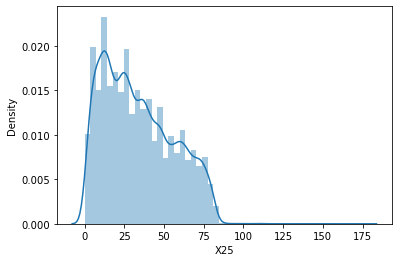

In [168]:
sns.distplot(data[data['X25'].notnull()]['X25'])

In [169]:
data['X25'].describe()

count    41296.000000
mean        33.740847
std         21.819722
min          0.000000
25%         15.000000
50%         30.000000
75%         50.000000
max        176.000000
Name: X25, dtype: float64

In [170]:
data['X25'] = data['X25'].fillna(data['X25'].median())

In [171]:
data['X30'].value_counts()

0.000    220
0.530    165
0.610    163
0.730    160
0.590    158
        ... 
1.050      1
1.055      1
1.045      1
1.104      1
1.846      1
Name: X30, Length: 1114, dtype: int64

In [172]:
data['X30'] = data['X30'].fillna(0.000)

In [173]:
data.head()

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X14,X17,X21,X22,X24,X25,X28,X30,X32
0,NaN,6000.0,6000.0,6000.0,36 months,C,C5,10+ years,MORTGAGE,VERIFIED - income,debt_consolidation,28.31,0,1,26.0,0,0.645,f
1,NaN,24000.0,24000.0,24000.0,36 months,A,A1,8 years,RENT,VERIFIED - income,debt_consolidation,16.03,0,1,30.0,0,0.262,w
2,NaN,35000.0,35000.0,35000.0,36 months,C,C2,10+ years,MORTGAGE,VERIFIED - income,debt_consolidation,32.49,0,0,30.0,0,0.499,w
3,NaN,10000.0,10000.0,10000.0,60 months,D,D1,10+ years,RENT,VERIFIED - income source,debt_consolidation,32.96,0,1,30.0,1,0.438,w
4,NaN,24000.0,24000.0,24000.0,60 months,B,B1,10+ years,MORTGAGE,VERIFIED - income,debt_consolidation,31.03,0,0,48.0,0,0.413,w


In [174]:
data['is_36month'] = data['X7'].apply(lambda x : 1 if x==" 36 months" else 0)

In [175]:
data['is_36month']

0        1
1        1
2        1
3        0
4        0
        ..
79995    1
79996    0
79997    1
79998    1
79999    1
Name: is_36month, Length: 80000, dtype: int64

In [176]:
data = data.drop(['X7'], axis=1)

In [177]:
data['is_f'] = data['X32'].apply(lambda x : 1 if x=="f" else 0)
data['is_f']

0        1
1        0
2        0
3        0
4        0
        ..
79995    1
79996    1
79997    1
79998    1
79999    1
Name: is_f, Length: 80000, dtype: int64

In [178]:
data = data.drop(['X32'], axis=1)
data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X14,X17,X21,X22,X24,X25,X28,X30,is_36month,is_f
0,NaN,6000.0,6000.0,6000.0,C,C5,10+ years,MORTGAGE,VERIFIED - income,debt_consolidation,28.31,0,1,26.0,0,0.645,1,1
1,NaN,24000.0,24000.0,24000.0,A,A1,8 years,RENT,VERIFIED - income,debt_consolidation,16.03,0,1,30.0,0,0.262,1,0
2,NaN,35000.0,35000.0,35000.0,C,C2,10+ years,MORTGAGE,VERIFIED - income,debt_consolidation,32.49,0,0,30.0,0,0.499,1,0
3,NaN,10000.0,10000.0,10000.0,D,D1,10+ years,RENT,VERIFIED - income source,debt_consolidation,32.96,0,1,30.0,1,0.438,0,0
4,NaN,24000.0,24000.0,24000.0,B,B1,10+ years,MORTGAGE,VERIFIED - income,debt_consolidation,31.03,0,0,48.0,0,0.413,0,0


In [179]:
data['X14'] = data['X14'].replace({'VERIFIED - income': 'verified', 'VERIFIED - income source': 'verified'})
data['is_verified'] = data['X14'].apply(lambda x : 1 if x=="verified" else 0)

In [180]:
data = data.drop(['X14'], axis=1)
data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X17,X21,X22,X24,X25,X28,X30,is_36month,is_f,is_verified
0,NaN,6000.0,6000.0,6000.0,C,C5,10+ years,MORTGAGE,debt_consolidation,28.31,0,1,26.0,0,0.645,1,1,1
1,NaN,24000.0,24000.0,24000.0,A,A1,8 years,RENT,debt_consolidation,16.03,0,1,30.0,0,0.262,1,0,1
2,NaN,35000.0,35000.0,35000.0,C,C2,10+ years,MORTGAGE,debt_consolidation,32.49,0,0,30.0,0,0.499,1,0,1
3,NaN,10000.0,10000.0,10000.0,D,D1,10+ years,RENT,debt_consolidation,32.96,0,1,30.0,1,0.438,0,0,1
4,NaN,24000.0,24000.0,24000.0,B,B1,10+ years,MORTGAGE,debt_consolidation,31.03,0,0,48.0,0,0.413,0,0,1


In [181]:
Label = LabelEncoder()
Label.fit(data["X11"])
data["X11"] = Label.transform(data["X11"])

In [182]:
Label.fit(data["X8"])
data["X8"] = Label.transform(data["X8"])
Label.fit(data["X9"])
data["X9"] = Label.transform(data["X9"])
Label.fit(data["X12"])
data["X12"] = Label.transform(data["X12"])
Label.fit(data["X17"])
data["X17"] = Label.transform(data["X17"])

In [183]:
data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X17,X21,X22,X24,X25,X28,X30,is_36month,is_f,is_verified
0,NaN,6000.0,6000.0,6000.0,2,14,1,0,2,28.31,0,1,26.0,0,0.645,1,1,1
1,NaN,24000.0,24000.0,24000.0,0,0,8,2,2,16.03,0,1,30.0,0,0.262,1,0,1
2,NaN,35000.0,35000.0,35000.0,2,11,1,0,2,32.49,0,0,30.0,0,0.499,1,0,1
3,NaN,10000.0,10000.0,10000.0,3,15,1,2,2,32.96,0,1,30.0,1,0.438,0,0,1
4,NaN,24000.0,24000.0,24000.0,1,5,1,0,2,31.03,0,0,48.0,0,0.413,0,0,1


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           0 non-null      float64
 1   X4           80000 non-null  float64
 2   X5           80000 non-null  float64
 3   X6           80000 non-null  float64
 4   X8           80000 non-null  int32  
 5   X9           80000 non-null  int32  
 6   X11          80000 non-null  int32  
 7   X12          80000 non-null  int32  
 8   X17          80000 non-null  int32  
 9   X21          80000 non-null  float64
 10  X22          80000 non-null  int64  
 11  X24          80000 non-null  int64  
 12  X25          80000 non-null  float64
 13  X28          80000 non-null  int64  
 14  X30          80000 non-null  float64
 15  is_36month   80000 non-null  int64  
 16  is_f         80000 non-null  int64  
 17  is_verified  80000 non-null  int64  
dtypes: float64(7), int32(5), int64(6)
memory usage

In [185]:
dataX = data.drop('X1', axis=1)

In [189]:
dataX.head()

,X4,X5,X6,X8,X9,X11,X12,X17,X21,X22,X24,X25,X28,X30,is_36month,is_f,is_verified
0,6000.0,6000.0,6000.0,2,14,1,0,2,28.31,0,1,26.0,0,0.645,1,1,1
1,24000.0,24000.0,24000.0,0,0,8,2,2,16.03,0,1,30.0,0,0.262,1,0,1
2,35000.0,35000.0,35000.0,2,11,1,0,2,32.49,0,0,30.0,0,0.499,1,0,1
3,10000.0,10000.0,10000.0,3,15,1,2,2,32.96,0,1,30.0,1,0.438,0,0,1
4,24000.0,24000.0,24000.0,1,5,1,0,2,31.03,0,0,48.0,0,0.413,0,0,1


In [190]:
modelChosen=XGBRegressor()
modelChosen.fit(train_X, train_y)
data['X1'] = modelChosen.predict(dataX)

In [191]:
data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X17,X21,X22,X24,X25,X28,X30,is_36month,is_f,is_verified
0,0.164398,6000.0,6000.0,6000.0,2,14,1,0,2,28.31,0,1,26.0,0,0.645,1,1,1
1,0.060645,24000.0,24000.0,24000.0,0,0,8,2,2,16.03,0,1,30.0,0,0.262,1,0,1
2,0.139493,35000.0,35000.0,35000.0,2,11,1,0,2,32.49,0,0,30.0,0,0.499,1,0,1
3,0.164723,10000.0,10000.0,10000.0,3,15,1,2,2,32.96,0,1,30.0,1,0.438,0,0,1
4,0.094819,24000.0,24000.0,24000.0,1,5,1,0,2,31.03,0,0,48.0,0,0.413,0,0,1


In [193]:
data.to_csv('Results from Rujia Yuan.csv')